In [2]:
import os
from dotenv import load_dotenv

In [3]:
load_dotenv()

True

In [4]:
path_to_csv_file = os.getenv("PATH_TO_DATASET")

if not os.path.isfile(path_to_csv_file):
    print('not a file')

In [5]:
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt
import seaborn as sns 

In [6]:
df = pd.read_csv(path_to_csv_file)
df.head()

,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://www.garage-pirenne.be/index.php?option=...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement


In [7]:
total_urls = len(df)
print(f'Number of total urls: {total_urls}')

number_of_types = df['type'].nunique()
print(f'Number of unique types: {number_of_types}')

types_count = df['type'].value_counts()
print(f'Type counts: {types_count}')

type_percentage = df['type'].value_counts(normalize=True) * 100
print(type_percentage.map('{:.2f}'.format))

Number of total urls: 651191
Number of unique types: 4
Type counts: type
benign        428103
defacement     96457
phishing       94111
malware        32520
Name: count, dtype: int64
type
benign        65.74
defacement    14.81
phishing      14.45
malware        4.99
Name: proportion, dtype: object


In [8]:
import plotly.express as px
import plotly.io as pio

pio.renderers.default = "browser"

In [9]:
fig_bar = px.histogram(
    df,
    x='type',
    title='Number of URLs for each type',
    labels={'type': 'URL Type', 'count': 'Number of URLs'},
    color='type',
    color_discrete_sequence=px.colors.qualitative.Bold
)
fig_bar.update_layout(
    xaxis_title='URL Type', 
    yaxis_title='Number of URLs',
    bargap=0.2
)

fig_bar.show()

In [10]:
df_phishing = df[df.type=='phishing']
df_phishing

,url,type
0,br-icloud.com.br,phishing
21,signin.eby.de.zukruygxctzmmqi.civpro.co.za,phishing
28,http://www.marketingbyinternet.com/mo/e56508df...,phishing
40,https://docs.google.com/spreadsheet/viewform?f...,phishing
72,retajconsultancy.com,phishing
...,...,...
651186,xbox360.ign.com/objects/850/850402.html,phishing
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,phishing
651188,www.gamespot.com/xbox360/action/deadspace/,phishing
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),phishing


In [11]:
df_malware = df[df.type=='malware']
df_defacement = df[df.type=='defacement']
df_benign = df[df.type=='benign']

In [12]:
import re
from collections import Counter

In [15]:
def tokenize_url(url):
    tokens = re.split(r'[/\=-_.?&=:@]', url.lower())
    tokens = [token for token in tokens if token and len(token) > 2]
    return tokens

def get_top_words(df, columns='url', top_n=15):
    all_tokens = []
    
    for url in df[columns]:
        all_tokens.extend(tokenize_url(url))
    
    return Counter(all_tokens).most_common(top_n)

In [16]:
print("Top phishing words:")
print(get_top_words(df_phishing))

print("Top malware words:")
print(get_top_words(df_malware))

print("\nTop defacement words:")
print(get_top_words(df_defacement))

print("\nTop benign words:")
print(get_top_words(df_benign))

Top phishing words:
[('com', 55707), ('www', 37208), ('http', 18811), ('html', 18593), ('org', 9792), ('net', 7589), ('https', 7367), ('htm', 6687), ('php', 6174), ('index', 5900), ('login', 4372), ('edu', 3617), ('tools', 3314), ('ietf', 3219), ('battle', 1954)]
Top malware words:
[('http', 24636), ('com', 11561), ('https', 6764), ('exe', 6243), ('mozi', 4178), ('info', 4019), ('9779', 3984), ('www', 3075), ('uploads', 2974), ('mixh', 2881), ('mitsui-jyuku', 2879), ('css', 2214), ('php', 2199), ('bins', 1703), ('apbfiber', 1147)]

Top defacement words:
[('http', 96515), ('com', 79887), ('www', 67340), ('index', 57865), ('php', 51451), ('option', 40060), ('itemid', 34356), ('view', 32002), ('html', 27676), ('content', 24187), ('article', 21798), ('component', 16960), ('catid', 11718), ('tmpl', 11179), ('page', 9902)]

Top benign words:
[('com', 324132), ('html', 68200), ('org', 38754), ('http', 34856), ('net', 28352), ('php', 27789), ('htm', 26912), ('index', 18863), ('wiki', 17263), (

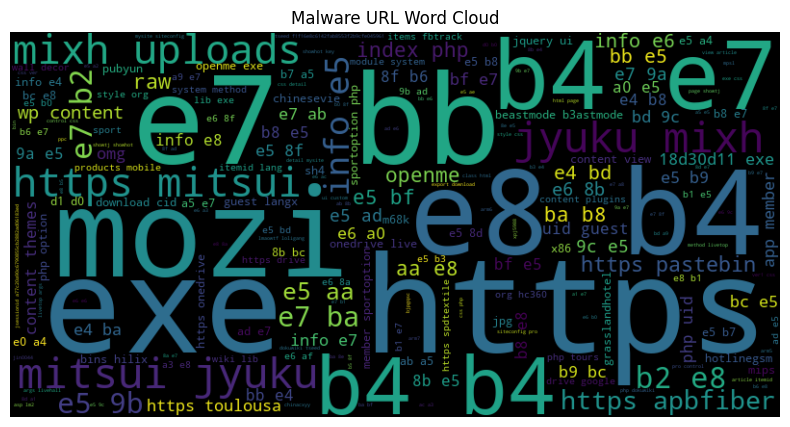

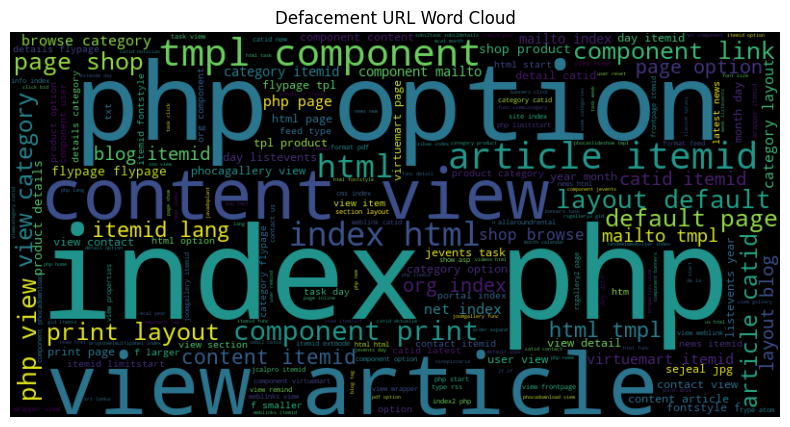

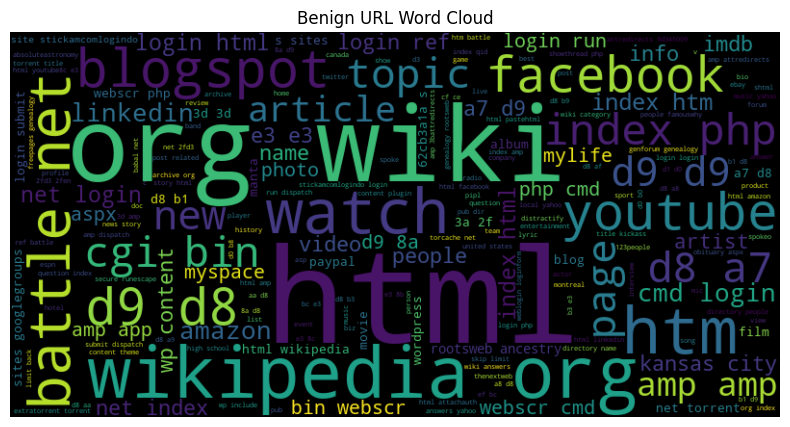

In [18]:
from wordcloud import WordCloud

def plot_wordcloud(df, title):
    all_text = ' '.join([' '.join(tokenize_url(url)) for url in df['url']])
    wordcloud = WordCloud(width=800, height=400, background_color='black').generate(all_text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

plot_wordcloud(df_malware, "Malware URL Word Cloud")
plot_wordcloud(df_defacement, "Defacement URL Word Cloud")
plot_wordcloud(df_benign, "Benign URL Word Cloud")
